In [ ]:
##daily0704
'''

整体排序：
np.sort :快速排序，类似于C++的stl中sort.
np.argsort :已排序的索引值.

部分排序：
np.partition ：类似于C++的nth_element和partition. 注意不是partial_sort.


'''

In [1]:
import numpy as np
from np_print import print_np

In [2]:
##复习一下数组索引
ar=np.arange(16).reshape(4,4)
row=np.array([2,1,0])
col=np.array([3,2,1])
print_np(ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 
shape: (4, 4)


In [3]:
ar[row,col]

array([11,  6,  1])

In [4]:
ar[row[:,np.newaxis],col]

array([[11, 10,  9],
       [ 7,  6,  5],
       [ 3,  2,  1]])

In [7]:
##多维正态分布
mean=np.array([0,0])
cov=np.array([[1,2],[2,5]])
m_n = np.random.multivariate_normal(mean,cov,16)

In [8]:
print_np(m_n)

[[-3.06279596e+00 -5.51153832e+00]
 [ 1.06955471e+00  2.10611080e+00]
 [-6.91010977e-01 -1.71148422e+00]
 [ 1.09676527e-01  1.94702064e+00]
 [-8.49064160e-01 -2.20549084e+00]
 [-3.14090560e-03  6.40706429e-01]
 [-3.67604441e-01  1.04220886e+00]
 [-9.47427869e-01 -3.11602469e-01]
 [ 2.26005313e+00  5.70016850e+00]
 [ 1.87130272e+00  4.12022946e+00]
 [ 8.79114919e-02  2.29225879e+00]
 [ 1.27637234e-01  3.68449645e-01]
 [-9.04961662e-02 -2.52220105e-01]
 [ 1.43064317e-01 -8.85230841e-02]
 [ 1.17075368e+00  3.42657622e+00]
 [ 1.41623462e+00  3.58979560e+00]] 
shape: (16, 2)


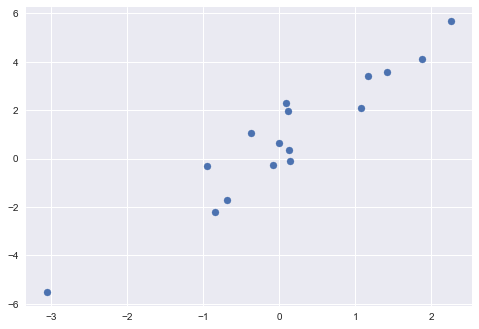

In [9]:
##绘个图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(m_n[:,0],m_n[:,1]);##注意添加分号后，不再显示对象的指针

In [12]:
ids=np.random.choice(m_n.shape[0],6,replace=False)
print_np(ids)

[14 11 10 12  2  1] 
shape: (6,)


In [13]:
selection=m_n[ids]
print_np(selection)

[[ 1.17075368  3.42657622]
 [ 0.12763723  0.36844964]
 [ 0.08791149  2.29225879]
 [-0.09049617 -0.25222011]
 [-0.69101098 -1.71148422]
 [ 1.06955471  2.1061108 ]] 
shape: (6, 2)


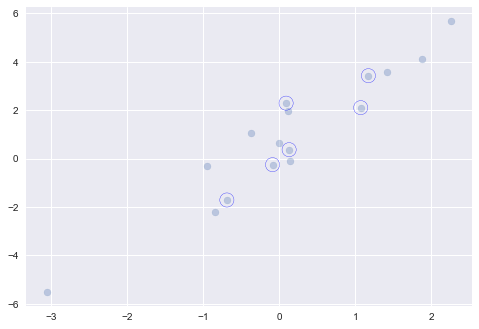

In [17]:
plt.scatter(m_n[:,0],m_n[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',edgecolor='b',s=200);

In [18]:
##关于数组索引的累加操作
z=np.zeros(5)
i=[0,1,1,2,2]
z[i]+=1##对每个索引，只执行了一次

In [19]:
z

array([1., 1., 1., 0., 0.])

In [20]:
##需要用np.add.at进行
z=np.zeros(5)
np.add.at(z,i,1)
z

array([1., 2., 2., 0., 0.])

In [21]:
x=np.random.randint(12,250,(6,5))
x

array([[229, 220,  27, 143, 220],
       [ 29, 149, 165, 202, 108],
       [207, 165, 108,  93,  34],
       [236, 150,  46, 155, 144],
       [130,  41,  92, 165, 230],
       [169,  66, 173,  92,  80]])

In [23]:
##1.全排序：np.sort
np.sort(x.ravel())

array([ 27,  29,  34,  41,  46,  66,  80,  92,  92,  93, 108, 108, 130,
       143, 144, 149, 150, 155, 165, 165, 165, 169, 173, 202, 207, 220,
       220, 229, 230, 236])

In [24]:
##>按行按列排
np.sort(x,axis=0)

array([[ 29,  41,  27,  92,  34],
       [130,  66,  46,  93,  80],
       [169, 149,  92, 143, 108],
       [207, 150, 108, 155, 144],
       [229, 165, 165, 165, 220],
       [236, 220, 173, 202, 230]])

In [25]:
np.sort(x,axis=1)

array([[ 27, 143, 220, 220, 229],
       [ 29, 108, 149, 165, 202],
       [ 34,  93, 108, 165, 207],
       [ 46, 144, 150, 155, 236],
       [ 41,  92, 130, 165, 230],
       [ 66,  80,  92, 169, 173]])

In [28]:
##2.部分排序
np.partition(x.ravel(),5)##前5个是最小的，后面是比前 5 个都大的. 注意两边都是无序的. 类似于C++的nth_element.

array([ 27,  29,  41,  34,  46,  66,  80, 165, 202, 108, 207, 165, 108,
        93, 220, 236, 150, 149, 155, 144, 130, 220,  92, 165, 230, 169,
       143, 173,  92, 229])

In [30]:
np.partition(x,3,axis=0)

array([[130,  41,  46,  92,  34],
       [169,  66,  27,  93,  80],
       [ 29, 149,  92, 143, 108],
       [207, 150, 108, 155, 144],
       [236, 165, 165, 165, 230],
       [229, 220, 173, 202, 220]])

In [31]:
y=np.random.randint(5,255,(10,2))
print_np(y)

[[251  28]
 [202 198]
 [201 158]
 [ 20 106]
 [  7 152]
 [ 41  20]
 [211 108]
 [100 211]
 [ 32  76]
 [201  69]] 
shape: (10, 2)


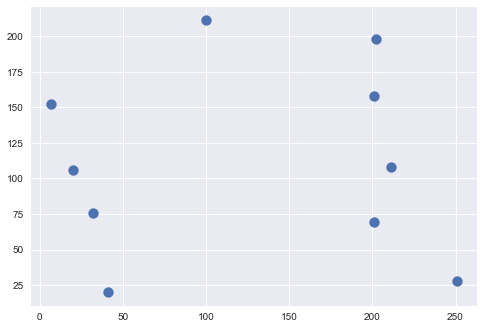

In [33]:
plt.scatter(y[:,0],y[:,1],s=100);

In [38]:
diff=y[:,np.newaxis,:]-y[np.newaxis,:,:]
print_np(diff)

[[[   0    0]
  [  49 -170]
  [  50 -130]
  [ 231  -78]
  [ 244 -124]
  [ 210    8]
  [  40  -80]
  [ 151 -183]
  [ 219  -48]
  [  50  -41]]

 [[ -49  170]
  [   0    0]
  [   1   40]
  [ 182   92]
  [ 195   46]
  [ 161  178]
  [  -9   90]
  [ 102  -13]
  [ 170  122]
  [   1  129]]

 [[ -50  130]
  [  -1  -40]
  [   0    0]
  [ 181   52]
  [ 194    6]
  [ 160  138]
  [ -10   50]
  [ 101  -53]
  [ 169   82]
  [   0   89]]

 [[-231   78]
  [-182  -92]
  [-181  -52]
  [   0    0]
  [  13  -46]
  [ -21   86]
  [-191   -2]
  [ -80 -105]
  [ -12   30]
  [-181   37]]

 [[-244  124]
  [-195  -46]
  [-194   -6]
  [ -13   46]
  [   0    0]
  [ -34  132]
  [-204   44]
  [ -93  -59]
  [ -25   76]
  [-194   83]]

 [[-210   -8]
  [-161 -178]
  [-160 -138]
  [  21  -86]
  [  34 -132]
  [   0    0]
  [-170  -88]
  [ -59 -191]
  [   9  -56]
  [-160  -49]]

 [[ -40   80]
  [   9  -90]
  [  10  -50]
  [ 191    2]
  [ 204  -44]
  [ 170   88]
  [   0    0]
  [ 111 -103]
  [ 179   32]
  [  10   39]]

 [[-15

In [39]:
sq_diff=diff**2

In [41]:
dist_sq=np.sum(sq_diff,axis=-1)
dist_sq

array([[    0, 31301, 19400, 59445, 74912, 44164,  8000, 56290, 50265,
         4181],
       [31301,     0,  1601, 41588, 40141, 57605,  8181, 10573, 43784,
        16642],
       [19400,  1601,     0, 35465, 37672, 44644,  2600, 13010, 35285,
         7921],
       [59445, 41588, 35465,     0,  2285,  7837, 36485, 17425,  1044,
        34130],
       [74912, 40141, 37672,  2285,     0, 18580, 43552, 12130,  6401,
        44525],
       [44164, 57605, 44644,  7837, 18580,     0, 36644, 39962,  3217,
        28001],
       [ 8000,  8181,  2600, 36485, 43552, 36644,     0, 22930, 33065,
         1621],
       [56290, 10573, 13010, 17425, 12130, 39962, 22930,     0, 22849,
        30365],
       [50265, 43784, 35285,  1044,  6401,  3217, 33065, 22849,     0,
        28610],
       [ 4181, 16642,  7921, 34130, 44525, 28001,  1621, 30365, 28610,
            0]], dtype=int32)

In [42]:
nearest=np.argsort(dist_sq,axis=1)
print_np(nearest)

[[0 9 6 2 1 5 8 7 3 4]
 [1 2 6 7 9 0 4 3 8 5]
 [2 1 6 9 7 0 8 3 4 5]
 [3 8 4 5 7 9 2 6 1 0]
 [4 3 8 7 5 2 1 6 9 0]
 [5 8 3 4 9 6 7 0 2 1]
 [6 9 2 0 1 7 8 3 5 4]
 [7 1 4 2 3 8 6 9 5 0]
 [8 3 5 4 7 9 6 2 1 0]
 [9 6 0 2 1 5 8 7 3 4]] 
shape: (10, 10)


In [44]:
K=2
nearest_partition=np.argpartition(dist_sq,K+1,axis=1)


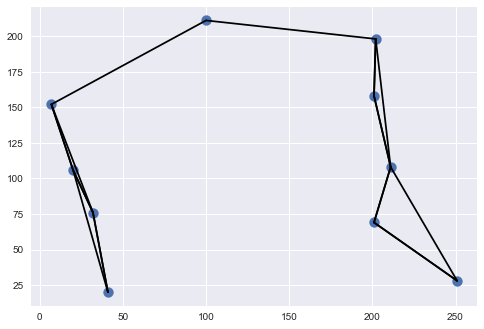

In [45]:
plt.scatter(y[:,0],y[:,1],s=100);
for i in range(y.shape[0]):
    for j in nearest_partition[i,:K+1]:
        plt.plot(*zip(y[j],y[i]),color='black');

In [46]:
import seaborn as sns
iris=sns.load_dataset('iris')

In [47]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
type(iris)

pandas.core.frame.DataFrame

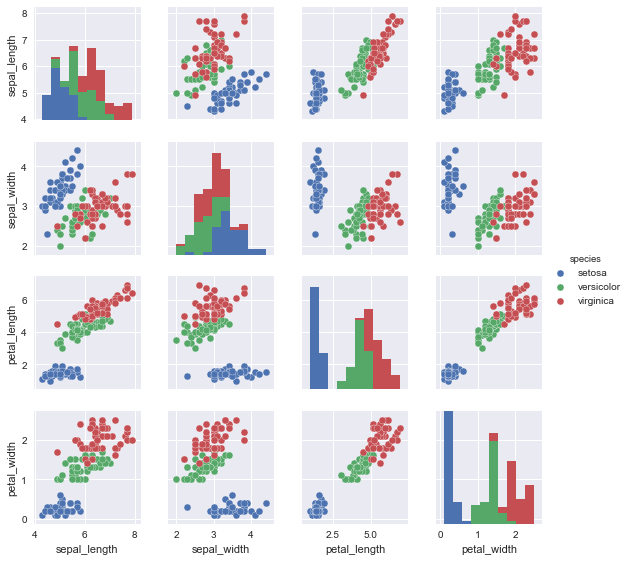

In [50]:
sns.set()
sns.pairplot(iris,hue='species',size=2);

In [51]:
##使用线性回归模型

##1.选择模型以及为模型实例定义超参数
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
##2.整理数据.
##这里仅仅制造出一些数据供拟合
rng=np.random.RandomState(42)
x = 10*rng.rand(50)
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [53]:
y=2*x-1+rng.randn(50)
y

array([ 7.22926896, 18.18565441, 13.52423055, 10.67206599,  0.64185082,
        1.4000462 , -0.29896653, 17.38064514, 11.36591852, 11.3984114 ,
       -0.26422614, 18.01311476, 14.97193082,  3.8584585 ,  3.66749887,
        3.59937032,  4.24562734,  9.18591626,  7.9701638 ,  5.80012793,
       10.75788366,  1.60421824,  3.736558  ,  5.13103024,  8.93392551,
       16.05975926,  2.92146552, 10.28822167, 11.2099274 , -0.7161115 ,
       11.51229264,  3.94851904,  0.26520582, 19.5423544 , 15.69289556,
       15.98984947,  5.17932245,  0.65443493, 12.77642131,  5.81548096,
        1.22109281,  9.26065077,  1.16566447, 16.66813782,  3.36710603,
       11.74868864,  6.14962364,  9.73011153,  9.40444538,  3.21035654])

In [54]:
##将x整理为X[样本数，特征数]矩阵
X=x[:,np.newaxis]

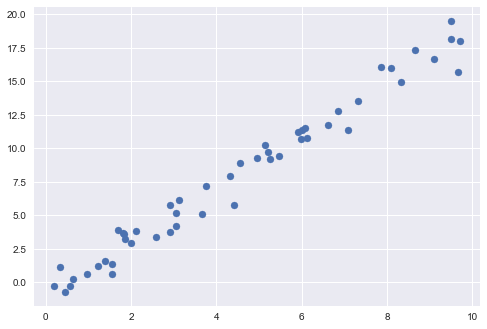

In [55]:
plt.scatter(x,y);

In [56]:
##3.回归计算
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
##斜率
model.coef_

array([1.9776566])

In [58]:
##截距
model.intercept_

-0.903310725531111

In [59]:
##4.预测
##再造一批数据
xfit=np.linspace(-1,11)##默认间隔0.25
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [61]:
X_fit=xfit[:,np.newaxis]
yfit=model.predict(X_fit)

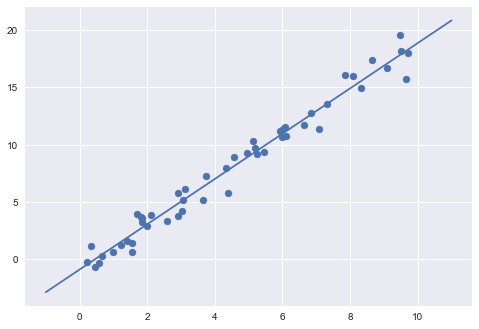

In [63]:
plt.scatter(x,y)
plt.plot(xfit,yfit);